<a href="https://colab.research.google.com/github/ananta126/assignments/blob/master/MACD%20strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This prrogram uses MACD crossover as stategy to take buy/sell decision.


In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving ADANIPORTS.NS.csv to ADANIPORTS.NS.csv


In [24]:
#Store the date to a dataframe
df= pd.read_csv('ADANIPORTS.NS.csv')

# Set the date to be the index
df= df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-01,2020-01-01,368.000000,379.250000,366.000000,377.649994,373.521973,11377167
2020-01-02,2020-01-02,377.950012,384.700012,376.500000,383.149994,378.961853,5919760
2020-01-03,2020-01-03,382.700012,384.350006,379.200012,382.500000,378.318970,3684824
2020-01-06,2020-01-06,388.000000,388.000000,374.750000,380.200012,376.044098,12482680
2020-01-07,2020-01-07,384.049988,389.750000,382.399994,384.799988,380.593811,8091465
...,...,...,...,...,...,...,...
2020-09-07,2020-09-07,355.000000,357.950012,347.200012,352.049988,352.049988,3344349
2020-09-08,2020-09-08,352.700012,355.950012,343.549988,345.600006,345.600006,2339457
2020-09-09,2020-09-09,344.399994,346.299988,335.350006,343.850006,343.850006,3413201
2020-09-10,2020-09-10,346.000000,348.950012,336.600006,341.600006,341.600006,3892385


In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

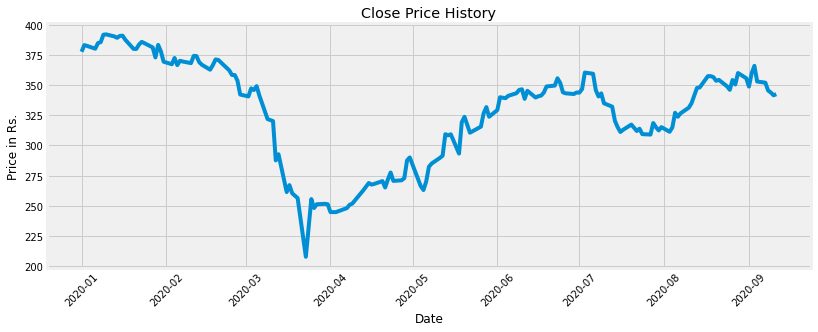

In [25]:
# Visually show the stock price.
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price in Rs.')
plt.show()

In [21]:
# Calculate MACD and Signal line indicators
# Calculate the short term exponential moving average.(EMA)
shortEMA=df.Close.ewm(span=12,adjust=False).mean()

# Calculate the long term exponential moving average(EMA)
longEMA = df.Close.ewm(span=26,adjust=False).mean()

#Calculate the MACD line
MACD = shortEMA-longEMA

#Calculate the signal line
signal=MACD.ewm(span=9,adjust=False).mean()

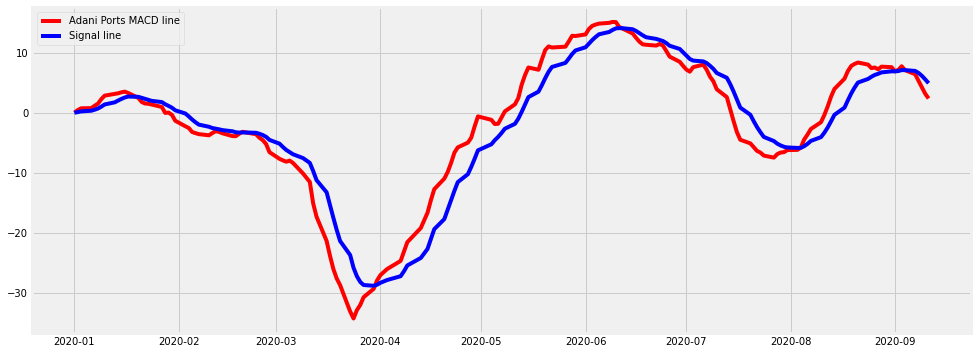

In [22]:
# Plot the chart

plt.figure(figsize=(15,6))
plt.plot(df.index,MACD,label='Adani Ports MACD line',color='red')
plt.plot(df.index,signal,label= 'Signal line',color='blue')
plt.legend(loc='upper left')
plt.show()


In [27]:
# Create new columns for the data.
df['MACD']= MACD
df['Signal line']= signal
# Show the data
df


,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
2020-01-01,2020-01-01,368.000000,379.250000,366.000000,377.649994,373.521973,11377167,0.000000,0.000000
2020-01-02,2020-01-02,377.950012,384.700012,376.500000,383.149994,378.961853,5919760,0.438746,0.087749
2020-01-03,2020-01-03,382.700012,384.350006,379.200012,382.500000,378.318970,3684824,0.725642,0.215328
2020-01-06,2020-01-06,388.000000,388.000000,374.750000,380.200012,376.044098,12482680,0.758674,0.323997
2020-01-07,2020-01-07,384.049988,389.750000,382.399994,384.799988,380.593811,8091465,1.142857,0.487769
...,...,...,...,...,...,...,...,...,...
2020-09-07,2020-09-07,355.000000,357.950012,347.200012,352.049988,352.049988,3344349,6.401848,6.944561
2020-09-08,2020-09-08,352.700012,355.950012,343.549988,345.600006,345.600006,2339457,5.291722,6.613993
2020-09-09,2020-09-09,344.399994,346.299988,335.350006,343.850006,343.850006,3413201,4.222061,6.135607
2020-09-10,2020-09-10,346.000000,348.950012,336.600006,341.600006,341.600006,3892385,3.156405,5.539766


In [38]:
# Create a funtion to signal when to buy and sell an asset
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1
  for i in range(0,len(signal)):
    if signal['MACD'][i]> signal['Signal line'][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i]< signal['Signal line'][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
  else:
     Buy.append(np.nan)
     Sell.append(np.nan)
  return(Buy,Sell)

In [39]:
# Create a buy and sell columns
a= buy_sell(df)
df['Buy Signal Price']=a[0]
df['Sell Signal Price']=a[1]


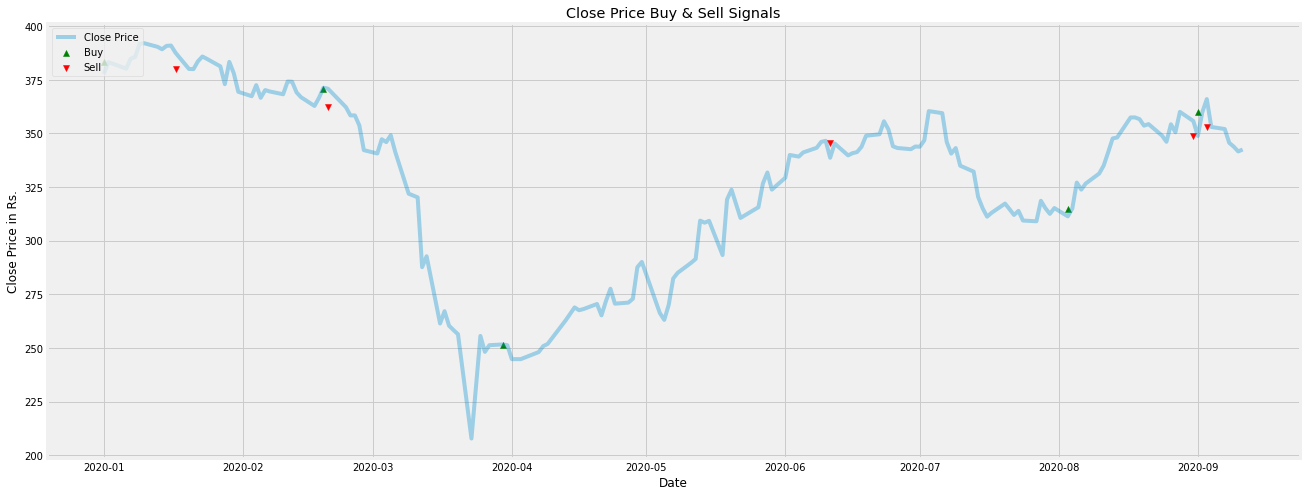

In [40]:
# Visually show Buy and Sell Signal

plt.figure(figsize=(20,8))
plt.scatter(df.index,df['Buy Signal Price'],color='green',label='Buy',marker='^', alpha=1)
plt.scatter(df.index,df['Sell Signal Price'],color='red',label='Sell',marker='v', alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price in Rs.')
plt.legend(loc='upper left')
plt.show()